In [182]:
import os
import re
import sys
import json
import datetime
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import matplotlib.dates as mdates

%matplotlib inline

In [183]:
# Shared var
dirPath = './Data/StationCount'
weekdayMappingDic = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun",
}
workday = ["Mon", "Tue", "Wed", "Thu", "Fri"]
weekend = ["Sat", "Sun"]
majorColor = '#1A659E'

In [184]:
# For plot
LDBluePalette = "crest"  # light -> dark 
DLBluePalette = "mako"  # dark -> light
sns.set(style='white', font='SimHei', font_scale=1.5)


In [199]:
# merge each monthly data file 
files = os.listdir(dirPath)
stationCountDf = pd.DataFrame()
for fileName in sorted(files):
    print("[ fileName ]", fileName)
    df = pd.read_excel(f"{dirPath}/{fileName}", engine="odf")
    df['weekday'] = list(map(lambda x: weekdayMappingDic[x.weekday()], df['Date']))
    weekdayCountDf = df.groupby('weekday', as_index=False).sum()
    weekdayCountDf.index = pd.RangeIndex(start=0, stop=len(weekdayCountDf))
    stationCountDf = stationCountDf.append(weekdayCountDf, ignore_index=True)

[ fileName ] 202103.ods
[ fileName ] 202104.ods
[ fileName ] 202105.ods
[ fileName ] 202106.ods
[ fileName ] 202107.ods
[ fileName ] 202108.ods


In [201]:
df

,Date,松山機場,中山國中,南京復興,忠孝復興,大安,科技大樓,六張犁,麟光,辛亥,...,景平,中和,橋和,中原,板新,Y板橋,新埔民生,幸福,新北產業園區,weekday
0,2021-08-01,757,2244,4735,10793,3441,2251,2161,1122,737,...,1059,1556,385,451,581,2220,635,1065,1112,Sun
1,2021-08-02,1834,7117,21686,18544,10890,6396,5839,2163,1757,...,2202,2764,1431,2248,1677,3906,1275,2066,2580,Mon
2,2021-08-03,1874,7487,22961,20363,11076,6754,6101,2188,1766,...,2268,2844,1522,2307,1622,3950,1253,2087,2616,Tue
3,2021-08-04,1905,7634,23343,21301,11375,6817,6072,2217,1878,...,2375,2774,1522,2357,1669,4003,1316,2186,2721,Wed
4,2021-08-05,1845,7548,23422,21699,11402,6737,6074,2263,1814,...,2357,2774,1474,2407,1649,4083,1346,2148,2664,Thu
5,2021-08-06,1846,7668,23255,23403,11344,7047,6146,2344,1741,...,2350,2910,1515,2316,1678,4843,1380,2310,2690,Fri
6,2021-08-07,687,3168,6839,15962,4735,3080,2661,1331,775,...,1227,1806,507,560,800,2658,736,1264,1055,Sat
7,2021-08-08,840,2832,5946,13633,3982,2818,2580,1301,806,...,1282,1919,506,531,650,2744,726,1254,1175,Sun
8,2021-08-09,2019,7728,23647,21279,11964,7006,6326,2246,1903,...,2347,2954,1570,2389,1676,4248,1398,2263,2856,Mon
9,2021-08-10,2047,8125,24833,22829,12455,7439,6687,2287,1953,...,2442,3016,1623,2470,1727,4326,1419,2357,2817,Tue


In [197]:
df

,Date,松山機場,中山國中,南京復興,忠孝復興,大安,科技大樓,六張犁,麟光,辛亥,...,景平,中和,橋和,中原,板新,Y板橋,新埔民生,幸福,新北產業園區,weekday
0,2021-08-01,757,2244,4735,10793,3441,2251,2161,1122,737,...,1059,1556,385,451,581,2220,635,1065,1112,Sun
1,2021-08-02,1834,7117,21686,18544,10890,6396,5839,2163,1757,...,2202,2764,1431,2248,1677,3906,1275,2066,2580,Mon
2,2021-08-03,1874,7487,22961,20363,11076,6754,6101,2188,1766,...,2268,2844,1522,2307,1622,3950,1253,2087,2616,Tue
3,2021-08-04,1905,7634,23343,21301,11375,6817,6072,2217,1878,...,2375,2774,1522,2357,1669,4003,1316,2186,2721,Wed
4,2021-08-05,1845,7548,23422,21699,11402,6737,6074,2263,1814,...,2357,2774,1474,2407,1649,4083,1346,2148,2664,Thu
5,2021-08-06,1846,7668,23255,23403,11344,7047,6146,2344,1741,...,2350,2910,1515,2316,1678,4843,1380,2310,2690,Fri
6,2021-08-07,687,3168,6839,15962,4735,3080,2661,1331,775,...,1227,1806,507,560,800,2658,736,1264,1055,Sat
7,2021-08-08,840,2832,5946,13633,3982,2818,2580,1301,806,...,1282,1919,506,531,650,2744,726,1254,1175,Sun
8,2021-08-09,2019,7728,23647,21279,11964,7006,6326,2246,1903,...,2347,2954,1570,2389,1676,4248,1398,2263,2856,Mon
9,2021-08-10,2047,8125,24833,22829,12455,7439,6687,2287,1953,...,2442,3016,1623,2470,1727,4326,1419,2357,2817,Tue


In [186]:
workdayStationCountDf = stationCountDf[stationCountDf['weekday'].isin(workday)]
weekendStationCountDf = stationCountDf[stationCountDf['weekday'].isin(weekend)]

In [187]:
workdayMeanCountDf = workdayStationCountDf.drop(['weekday'], axis=1).mean() \
    .to_frame(name='count') \
    .sort_values('count', ascending=False) \
    .reset_index().rename(columns={'index':'station'})
weekendMeanCountDf = weekendStationCountDf.drop(['weekday'], axis=1).mean() \
    .to_frame(name='count') \
    .sort_values('count', ascending=False) \
    .reset_index().rename(columns={'index':'station'})

In [188]:
len(workdayMeanCountDf) 

119

In [189]:
weekendMeanCountDf.iloc[:6]

,station,count
0,台北車站,277196.500000
1,西門,136751.166667
2,市政府,115526.250000
3,中山,95465.583333
4,忠孝復興,94154.500000
5,BL板橋,77416.083333


# 台北捷運站人流 Top 5

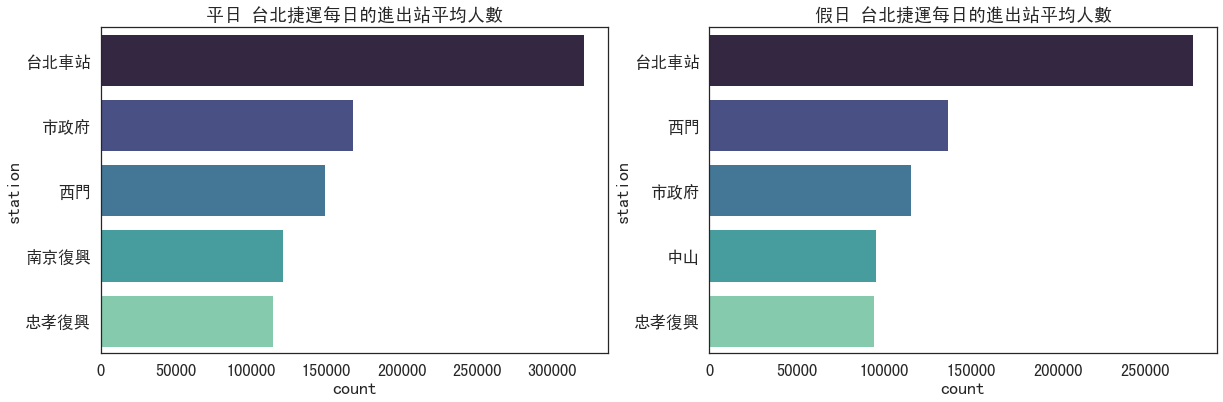

In [190]:
topN = 5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(y="station", x="count", data=workdayMeanCountDf.iloc[:topN], palette=DLBluePalette, ax= ax1).set_title('平日 台北捷運每日的進出站平均人數')
sns.barplot(y="station", x="count", data=weekendMeanCountDf.iloc[:topN], palette=DLBluePalette, ax= ax2).set_title('假日 台北捷運每日的進出站平均人數')
plt.savefig("./Result/meanStationCount.png", dpi=1200, facecolor=fig.get_facecolor())

# 台北捷運各站人流 Bottom 5

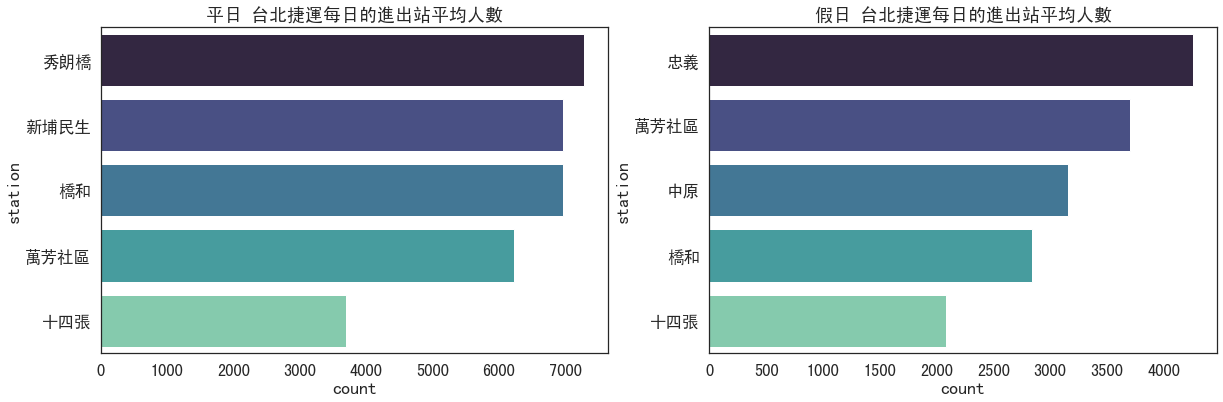

In [191]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(y="station", x="count", data=workdayMeanCountDf.iloc[-topN:], palette=DLBluePalette, ax= ax1).set_title('平日 台北捷運每日的進出站平均人數')
sns.barplot(y="station", x="count", data=weekendMeanCountDf.iloc[-topN:], palette=DLBluePalette, ax= ax2).set_title('假日 台北捷運每日的進出站平均人數')
plt.savefig("./Result/meanStationCount_bottom.png", dpi=1200, facecolor=fig.get_facecolor())

In [192]:
stationCountDf.head()

,weekday,松山機場,中山國中,南京復興,忠孝復興,大安,科技大樓,六張犁,麟光,辛亥,...,景平,中和,橋和,中原,板新,Y板橋,新埔民生,幸福,新北產業園區,month
0,Fri,18198,63526,191427,194678,116834,63563,51031,16982,13829,...,16264,20667,9531,14389,12358,38623,10830,17252,18319,202103
1,Mon,19754,66593,192439,188647,118131,66647,54042,19925,15340,...,18852,23295,10153,14912,13599,37300,11686,18758,20383,202103
2,Sat,10782,39034,104917,182927,72846,48301,35122,18589,10745,...,12090,18387,4974,5645,8553,32703,8809,14005,11844,202103
3,Sun,10910,30833,80310,136380,56093,38472,27737,17111,9521,...,11040,16322,4407,5041,6852,29476,7350,12389,10662,202103
4,Thu,16128,61002,180483,168193,109977,61123,48775,16858,13630,...,15860,19621,9220,13961,11926,30524,9817,15731,17667,202103


In [193]:
weeklyStationCountDf = stationCountDf.resample('W', on='Date').sum()
weeklyStationCountDf['weeklyCount'] = weeklyStationCountDf.sum(axis=1, numeric_only=True) 
weeklyStationCountDf = weeklyStationCountDf.reset_index().rename(columns={weeklyStationCountDf.index.name:'Date'})
weeklyStationCountDf = weeklyStationCountDf[:-1] # remove the last week ( less than a week )
weeklyStationCountDf.to_csv('./Result/weeklyStationCount.csv', encoding="utf-8-sig")

KeyError: 'The grouper name Date is not found'

,台北車站,西門,市政府,忠孝復興,南京復興
7,913080,428590,427897,307702,273693


,台北車站,西門,市政府,忠孝復興,南京復興
15,121275,59152,76807,59851,54523


In [ ]:
# get min, max week of station count value
minWeekIdx = weeklyStationCountDf['weeklyCount'].idxmin()
maxWeekIdx = weeklyStationCountDf['weeklyCount'].idxmax()
maxWeekDate = weeklyStationCountDf.iloc[maxWeekIdx]['Date']
minWeekDate = weeklyStationCountDf.iloc[minWeekIdx]['Date']

maxWeekDate, max(weeklyStationCountDf['weeklyCount']), minWeekDate, min(weeklyStationCountDf['weeklyCount'])

(Timestamp('2021-04-25 00:00:00'),
 14597657,
 Timestamp('2021-06-20 00:00:00'),
 2758101)

# 疫情對台北捷運總進出人數的影響  (2021.03 - 2021.08)

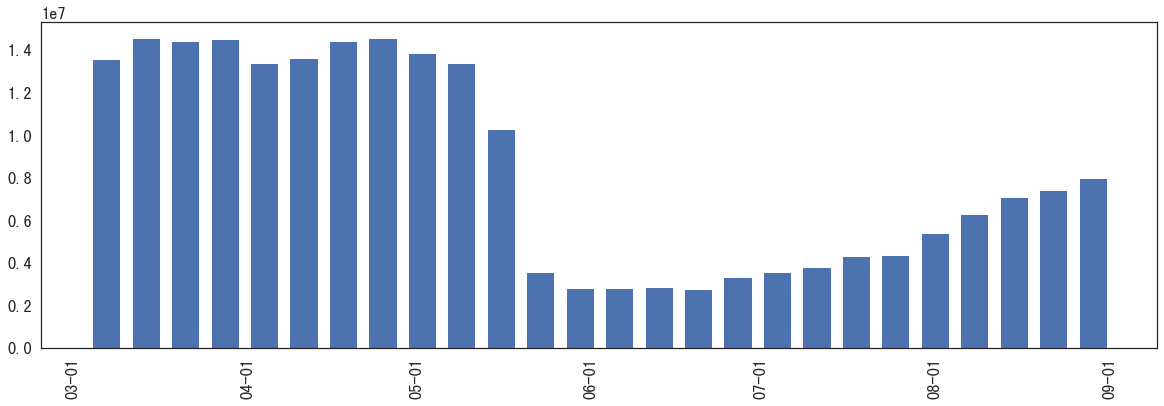

In [ ]:
fig, ax1= plt.subplots(figsize=(20, 6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.bar(weeklyStationCountDf['Date'], weeklyStationCountDf['weeklyCount'], width=5)
# sns.barplot(data=weeklyStationCountDf, x="Date", y="weeklyCount", ax=ax1, color=majorColor).set_title('台北捷運每週總進出人數 (2021/03 - 2021/08)')
ax1.set(ylim=(0, max(weeklyStationCountDf['weeklyCount'])*1.05))
plt.xticks(rotation=90)
plt.savefig("./Result/weeklyTotalStationCount.png", dpi=1200, facecolor=fig.get_facecolor())

In [ ]:
def coefficientVariation(x):
    return np.std(x, ddof=1) / np.mean(x) * 100

In [ ]:
temDf = stationCountDf.melt(id_vars=["Date"], var_name="station", value_name="count")
temGroupByDf = temDf.groupby('station').agg({'count', coefficientVariation})
sortedCountCVStations = temGroupByDf['count']['coefficientVariation'].sort_values(ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [ ]:
highestCountCVStation = sortedCountCVStations.keys()[0]
lowestCountCVStation = sortedCountCVStations.keys()[-1]
sortedCountCVStations

station
動物園       98.103654
小南門       76.344557
西湖        76.078501
輔大        74.863535
南港軟體園區    72.717677
            ...    
台北橋       51.891356
竹圍        51.392796
中和        51.154784
三重國小      51.010825
復興崗       50.723919
Name: coefficientVariation, Length: 119, dtype: float64

In [ ]:
maxWeek_highestCountCVStation = weeklyStationCountDf.iloc[maxWeekIdx][highestCountCVStation]
minWeek_highestCountCVStation = weeklyStationCountDf.iloc[minWeekIdx][highestCountCVStation]

maxWeek_lowestCountCVStation = weeklyStationCountDf.iloc[maxWeekIdx][lowestCountCVStation]
minWeek_lowestCountCVStation = weeklyStationCountDf.iloc[minWeekIdx][lowestCountCVStation]

In [ ]:
maxWeek_highestCountCVStation, minWeek_highestCountCVStation, (maxWeek_highestCountCVStation - minWeek_highestCountCVStation) / maxWeek_highestCountCVStation

(42337, 3258, 0.9230460353827621)

In [ ]:
maxWeek_highestCountCVStation, minWeek_highestCountCVStation, (maxWeek_lowestCountCVStation - minWeek_lowestCountCVStation) / maxWeek_lowestCountCVStation

(42337, 3258, 0.7303024465420921)